# NBA MVP Predictor

## Data Initialization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import cufflinks as cf
cf.go_offline()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be impo

In [2]:
df = pd.read_csv('NBA_2010_2019.csv')

In [3]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVP,Year
0,Steven Adams\adamsst01,C,25.0,OKC,80.0,80.0,33.4,6.0,10.1,0.595,...,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,0,2019
1,Bam Adebayo\adebaba01,C,21.0,MIA,82.0,28.0,23.3,3.4,5.9,0.576,...,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,0,2019
2,LaMarcus Aldridge\aldrila01,C,33.0,SAS,81.0,81.0,33.2,8.4,16.3,0.519,...,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,0,2019
3,Jarrett Allen\allenja01,C,20.0,BRK,80.0,80.0,26.2,4.2,7.1,0.590,...,4.4,3.3,7.6,0.175,0.2,1.4,1.6,1.9,0,2019
4,Al-Farouq Aminu\aminual01,PF,28.0,POR,81.0,81.0,28.3,3.2,7.3,0.433,...,3.0,2.8,5.8,0.121,0.1,0.6,0.7,1.5,0,2019


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 43 columns):
Player    3373 non-null object
Pos       3373 non-null object
Age       3373 non-null float64
Tm        3373 non-null object
G         3373 non-null float64
GS        3373 non-null float64
MP        3373 non-null float64
FG        3373 non-null float64
FGA       3373 non-null float64
FG%       3373 non-null float64
3P        3373 non-null float64
3PA       3373 non-null float64
3P%       3373 non-null float64
2P        3373 non-null float64
2PA       3373 non-null float64
2P%       3373 non-null float64
eFG%      3373 non-null float64
FT        3373 non-null float64
FTA       3373 non-null float64
FT%       3373 non-null float64
ORB       3373 non-null float64
DRB       3373 non-null float64
TRB       3373 non-null float64
AST       3373 non-null float64
STL       3373 non-null float64
BLK       3373 non-null float64
TOV       3373 non-null float64
PF        3373 non-null float64


#### Randomly undersample, then oversample using SMOTE to create a balanced data set.

##### First scale data (b/c SMOTE uses KNN which needs scaled data), then split into train and test data, then resample:

In [26]:
# Get features we want.
resample_df=df[['Age','G','GS','MP','FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', 'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'MVP']]

In [27]:
# Scale data.
scaler = StandardScaler()
scaler.fit(resample_df.drop('MVP', axis=1))
scaled_features = scaler.transform(resample_df.drop('MVP', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=resample_df.columns[:-1])
scaled_df.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FTr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,-0.387773,1.146897,1.582215,1.206145,1.089215,0.387653,2.590099,-1.192200,-1.287580,-2.321019,...,0.804100,-0.596238,1.539047,2.180763,1.970119,1.286819,0.470824,0.402677,0.583014,0.848144
1,-1.347213,1.306123,-0.206791,-0.098245,-0.212440,-0.610679,2.252785,-1.192200,-1.183031,-0.792700,...,1.641106,-0.718415,0.738756,1.633062,1.169369,1.433696,-0.009542,2.030273,0.850842,0.638573
2,1.531108,1.226510,1.616619,1.180315,2.290743,1.861382,1.240844,-1.056575,-1.026208,-0.502320,...,0.409742,1.541856,2.151035,1.176645,2.039749,1.360258,1.213208,-0.501543,0.850842,1.197430
3,-1.587073,1.146897,1.582215,0.276283,0.188069,-0.325441,2.501332,-1.056575,-0.973934,-1.304687,...,1.834262,-0.698052,1.209516,1.541778,1.447891,1.507135,0.252476,1.306897,0.774320,0.708430
4,0.331808,1.226510,1.616619,0.547493,-0.312568,-0.277902,-0.285943,0.435304,0.542023,0.300047,...,0.248779,-1.146034,0.550452,1.085361,0.821217,0.515714,0.208806,0.583521,0.429970,0.429001


In [28]:
# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(scaled_features,resample_df['MVP'],
                                                    test_size=0.30,random_state=42)

In [29]:
# Create a RandomUnderSampler object to bring down the majority class (non-MVPs).
rus = RandomUnderSampler(sampling_strategy = 0.25)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
Counter(y_train_rus)

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 28, 1: 7})

In [32]:
# Now use SMOTE to oversample and balance the classes.
smote = SMOTE(sampling_strategy='auto')
X_SMOTE, y_SMOTE = smote.fit_resample(X_train_rus, y_train_rus)
Counter(y_SMOTE)

C:\Users\dylan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 28, 1: 28})

## K Nearest Neighbors

In [34]:
# Find K value with lowest error rate to use for the model.

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_SMOTE, y_SMOTE)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

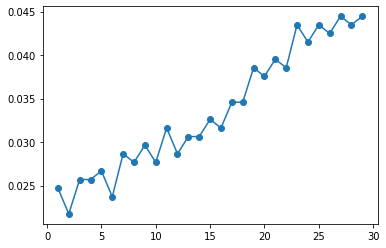

In [35]:
plt.plot(range(1,30), error_rate, marker='o')
#Error rate steadily increases but K=2 may over fit.
#Try with K=2 and K=6.

In [38]:
#K = 2
knn_2 = KNeighborsClassifier(n_neighbors=2)

knn_2.fit(X_SMOTE, y_SMOTE)
pred_2 = knn_2.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred_2))
print('\n')
print(classification_report(y_test,pred_2))

WITH K=2


[[987  22]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1009
           1       0.12      1.00      0.21         3

    accuracy                           0.98      1012
   macro avg       0.56      0.99      0.60      1012
weighted avg       1.00      0.98      0.99      1012



In [39]:
# No MVPs incorrectly predicted to be non-MVPs. 22 non-MVPs predicted to be MVPs

In [62]:
#K = 6
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_SMOTE, y_SMOTE)
pred_6 = knn_6.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred_6))
print('\n')
print(classification_report(y_test,pred_6))

WITH K=6


[[985  24]
 [  0   3]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1009
           1       0.11      1.00      0.20         3

    accuracy                           0.98      1012
   macro avg       0.56      0.99      0.59      1012
weighted avg       1.00      0.98      0.99      1012



In [42]:
# K = 6 has more incorrect predicions but neither seems to be overfit.

## Random Forest

In [44]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_SMOTE, y_SMOTE)
rfc_preds = rfc.predict(X_test)

In [45]:
print(classification_report(y_test, rfc_preds))
print(confusion_matrix(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1009
           1       0.10      1.00      0.18         3

    accuracy                           0.97      1012
   macro avg       0.55      0.99      0.58      1012
weighted avg       1.00      0.97      0.98      1012

[[982  27]
 [  0   3]]


In [47]:
# Has slightly more false positives than the KNN models.

In [50]:
# Determine best (most predictive) features.
featureScores = pd.Series(data=rfc.feature_importances_,
                          index=resample_df.drop('MVP', axis=1).columns)
featureScores.sort_values(ascending=False, inplace=True)
featureScores

OBPM     0.086412
OWS      0.084506
VORP     0.084425
PER      0.083770
WS/48    0.077583
PTS      0.074699
WS       0.074344
BPM      0.066491
DWS      0.059262
FG       0.051750
MP       0.047450
TOV      0.034200
AST      0.033665
FGA      0.032183
USG%     0.030034
FT       0.017134
GS       0.016710
TS%      0.016681
3P       0.008748
2P%      0.005000
2P       0.003861
2PA      0.002468
3PA      0.002129
FTA      0.002006
G        0.001135
STL      0.001133
eFG%     0.000990
DBPM     0.000604
PF       0.000204
DRB      0.000138
TRB      0.000074
Age      0.000070
3P%      0.000069
FG%      0.000069
FT%      0.000000
ORB      0.000000
BLK      0.000000
FTr      0.000000
dtype: float64

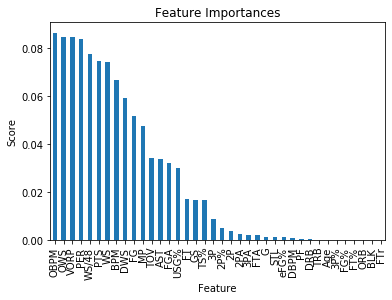

In [53]:
#Graphically:
graph=featureScores.plot(kind='bar', title='Feature Importances')
graph.set_xlabel("Feature")
graph.set_ylabel("Score")
plt.show()

## Predicting the 2020 MVP

In [55]:
df2020 = pd.read_csv('2020 Stats YTD.csv')

In [56]:
df2020['3P%'].fillna(0)

0      0.333
1      0.077
2      0.389
3      0.350
4      0.394
       ...  
638    0.361
639    0.240
640    0.000
641    0.000
642    0.000
Name: 3P%, Length: 643, dtype: float64

In [57]:
df2020.dropna(inplace=True)

In [58]:
#Scale the data
df2020_scale = df2020[['Age','G','GS','MP','FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', 'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP']]
scaler= StandardScaler()
scaler.fit(df2020_scale)
scaled_2020 = scaler.transform(df2020_scale)

In [59]:
#Test with K = 2 and add predicted MVPs to a list.

pred_2_2020 = knn_2.predict(scaled_2020)
knn_2_MVPs_2020 = np.where(pred_2_2020 == 1)

In [60]:
df2020.reset_index(drop=True, inplace=True)

In [66]:
# KNN 2 predicts these players to be MVP. Obviously only 1 can be MVP/year.
df2020.loc[knn_2_MVPs_2020]

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
10,12,Giannis Antetokounmpo\antetgi01,25,60,60,30.7,11.0,19.9,0.552,1.5,...,0.498,37.4,6.1,4.9,11.0,0.286,7.7,4.2,11.8,6.5
89,81,Jimmy Butler\butleji01,30,56,56,34.2,6.0,13.3,0.456,0.5,...,0.686,25.1,6.3,2.6,8.9,0.223,4.0,1.3,5.4,3.6
141,121,Anthony Davis\davisan02,26,58,58,34.5,9.2,18.1,0.507,1.2,...,0.475,29.7,6.7,4.3,11.0,0.265,5.9,2.8,8.7,5.4
155,132,Luka Dončić\doncilu01,20,57,57,33.7,9.6,20.7,0.462,2.8,...,0.448,36.8,6.0,2.4,8.4,0.210,7.2,1.1,8.4,5.0
225,196,James Harden\hardeja01,30,64,64,36.8,9.8,22.5,0.438,4.4,...,0.529,36.1,9.4,2.8,12.2,0.249,7.9,1.3,9.2,6.6
282,248,LeBron James\jamesle01,35,63,63,34.9,9.7,19.5,0.496,2.2,...,0.289,31.4,6.0,3.6,9.7,0.211,6.6,1.9,8.5,5.8
295,259,Nikola Jokić\jokicni01,24,67,67,32.4,7.9,15.0,0.526,1.1,...,0.283,26.8,6.1,3.3,9.3,0.206,5.4,2.3,7.6,5.3
331,292,Kawhi Leonard\leonaka01,28,54,54,32.2,9.2,19.8,0.467,2.1,...,0.355,33.1,4.9,3.2,8.1,0.224,6.5,2.5,9.0,4.8
334,295,Damian Lillard\lillada01,29,61,61,37.2,9.1,20.0,0.454,3.9,...,0.379,30.0,9.2,0.7,9.9,0.209,7.7,-0.9,6.8,5.1
570,521,Trae Young\youngtr01,21,60,60,35.3,9.1,20.8,0.437,3.4,...,0.448,34.9,5.3,0.5,5.9,0.133,6.3,-2.3,4.0,3.2


In [68]:
probs_2 = knn_2.predict_proba(scaled_2020)
probs_2[knn_2_MVPs_2020]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [64]:
pred_6_2020 = knn_6.predict(scaled_2020)
knn_6_MVPs_2020 = np.where(pred_6_2020 == 1)

In [65]:
# KNN 6 predicts these players to be MVP. Obviously only 1 can be MVP/year.
df2020.loc[knn_6_MVPs_2020]

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
10,12,Giannis Antetokounmpo\antetgi01,25,60,60,30.7,11.0,19.9,0.552,1.5,...,0.498,37.4,6.1,4.9,11.0,0.286,7.7,4.2,11.8,6.5
89,81,Jimmy Butler\butleji01,30,56,56,34.2,6.0,13.3,0.456,0.5,...,0.686,25.1,6.3,2.6,8.9,0.223,4.0,1.3,5.4,3.6
141,121,Anthony Davis\davisan02,26,58,58,34.5,9.2,18.1,0.507,1.2,...,0.475,29.7,6.7,4.3,11.0,0.265,5.9,2.8,8.7,5.4
155,132,Luka Dončić\doncilu01,20,57,57,33.7,9.6,20.7,0.462,2.8,...,0.448,36.8,6.0,2.4,8.4,0.210,7.2,1.1,8.4,5.0
225,196,James Harden\hardeja01,30,64,64,36.8,9.8,22.5,0.438,4.4,...,0.529,36.1,9.4,2.8,12.2,0.249,7.9,1.3,9.2,6.6
282,248,LeBron James\jamesle01,35,63,63,34.9,9.7,19.5,0.496,2.2,...,0.289,31.4,6.0,3.6,9.7,0.211,6.6,1.9,8.5,5.8
295,259,Nikola Jokić\jokicni01,24,67,67,32.4,7.9,15.0,0.526,1.1,...,0.283,26.8,6.1,3.3,9.3,0.206,5.4,2.3,7.6,5.3
331,292,Kawhi Leonard\leonaka01,28,54,54,32.2,9.2,19.8,0.467,2.1,...,0.355,33.1,4.9,3.2,8.1,0.224,6.5,2.5,9.0,4.8
334,295,Damian Lillard\lillada01,29,61,61,37.2,9.1,20.0,0.454,3.9,...,0.379,30.0,9.2,0.7,9.9,0.209,7.7,-0.9,6.8,5.1
340,301,Kyle Lowry\lowryky01,33,54,54,36.5,5.9,14.2,0.417,2.9,...,0.418,23.2,4.3,3.0,7.3,0.177,2.5,0.9,3.4,2.7


In [69]:
probs_6 = knn_6.predict_proba(scaled_2020)
probs_6[knn_6_MVPs_2020]

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ]])

### Using RFC

In [74]:
preds_rfc_2020 = rfc.predict(scaled_2020)

In [106]:
MVPs_rfc = np.where((preds_rfc_2020) == 1)
df2020.loc[MVPs_rfc]

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
10,12,Giannis Antetokounmpo\antetgi01,25,60,60,30.7,11.0,19.9,0.552,1.5,...,0.498,37.4,6.1,4.9,11.0,0.286,7.7,4.2,11.8,6.5
141,121,Anthony Davis\davisan02,26,58,58,34.5,9.2,18.1,0.507,1.2,...,0.475,29.7,6.7,4.3,11.0,0.265,5.9,2.8,8.7,5.4
155,132,Luka Dončić\doncilu01,20,57,57,33.7,9.6,20.7,0.462,2.8,...,0.448,36.8,6.0,2.4,8.4,0.210,7.2,1.1,8.4,5.0
225,196,James Harden\hardeja01,30,64,64,36.8,9.8,22.5,0.438,4.4,...,0.529,36.1,9.4,2.8,12.2,0.249,7.9,1.3,9.2,6.6
282,248,LeBron James\jamesle01,35,63,63,34.9,9.7,19.5,0.496,2.2,...,0.289,31.4,6.0,3.6,9.7,0.211,6.6,1.9,8.5,5.8
295,259,Nikola Jokić\jokicni01,24,67,67,32.4,7.9,15.0,0.526,1.1,...,0.283,26.8,6.1,3.3,9.3,0.206,5.4,2.3,7.6,5.3
331,292,Kawhi Leonard\leonaka01,28,54,54,32.2,9.2,19.8,0.467,2.1,...,0.355,33.1,4.9,3.2,8.1,0.224,6.5,2.5,9.0,4.8
334,295,Damian Lillard\lillada01,29,61,61,37.2,9.1,20.0,0.454,3.9,...,0.379,30.0,9.2,0.7,9.9,0.209,7.7,-0.9,6.8,5.1
516,472,Karl-Anthony Towns\townska01,24,35,35,33.9,9.0,17.8,0.508,3.3,...,0.363,28.8,3.8,1.3,5.1,0.205,7.0,0.8,7.8,2.9
570,521,Trae Young\youngtr01,21,60,60,35.3,9.1,20.8,0.437,3.4,...,0.448,34.9,5.3,0.5,5.9,0.133,6.3,-2.3,4.0,3.2


In [129]:
predicted_probs = rfc.predict_proba(scaled_2020)
prob_df = pd.DataFrame(predicted_probs[MVPs_rfc])
prob_df['Player'] = ['Giannis Antetokounmpo', 'Anthony Davis', 'Luka Doncic', 'James Harden',
                    'LeBron James', 'Nikola Jokic', 'Kawhi Leonard', 'Damian Lillard',
                    'Karl Anthony Towns', 'Trae Young']

In [135]:
prob_df.sort_values(1, axis=0, ascending=False)
# This shows Giannis had the highest percentage of decision trees that predicted
# him to be MVP. I would consider him to be the favorite with James Harden not too
# far behind.
# I believe this analysis is accurate as Giannis is currently the favorite to win
# according to the Vegas odds.

,0,1,Player
0,0.033,0.967,Giannis Antetokounmpo
3,0.054,0.946,James Harden
4,0.168,0.832,LeBron James
2,0.181,0.819,Luka Doncic
6,0.181,0.819,Kawhi Leonard
1,0.208,0.792,Anthony Davis
7,0.229,0.771,Damian Lillard
5,0.407,0.593,Nikola Jokic
8,0.481,0.519,Karl Anthony Towns
9,0.483,0.517,Trae Young


Index([0, 1, 'Player'], dtype='object')